8/11/2023 Terri Hoare




In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


In [2]:
stimulus = pd.read_csv('STIMULUS.CSV')

In [3]:
type(stimulus)

pandas.core.frame.DataFrame

In [4]:
stimulus.shape

(5, 2)

In [5]:
# Print column names
stimulus.columns.values

array(['DRUG_X', 'TIME_Y'], dtype=object)

In [6]:
# Print description of Boston housing data set
stimulus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DRUG_X  5 non-null      int64
 1   TIME_Y  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


Now let's explore the data set itself.

In [7]:
stimulus.head()


,DRUG_X,TIME_Y
0,1,1
1,2,1
2,3,2
3,4,2
4,5,4


In [8]:
stimulus['TIME_Y']


0    1
1    1
2    2
3    2
4    4
Name: TIME_Y, dtype: int64

## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns.

In [9]:
stimulus.describe()

,DRUG_X,TIME_Y
count,5.000000,5.000000
mean,3.000000,2.000000
std,1.581139,1.224745
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,2.000000
max,5.000000,4.000000


### Scatter plots
***

Let's look at some scatter plots for three variables: 'CRIM', 'RM' and 'PTRATIO'.

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear?

Text(0.5, 1.0, 'Relationship between Drug and Response Time')

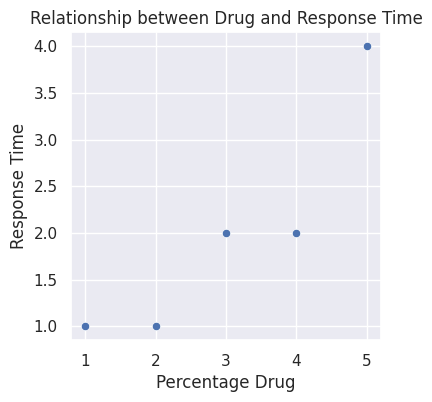

In [10]:
sns.set(rc={'figure.figsize':(4,4)})
sns.scatterplot(data=stimulus, x="DRUG_X", y="TIME_Y")
plt.xlabel("Percentage Drug")
plt.ylabel("Response Time")
plt.title("Relationship between Drug and Response Time")

<Axes: xlabel='DRUG_X', ylabel='TIME_Y'>

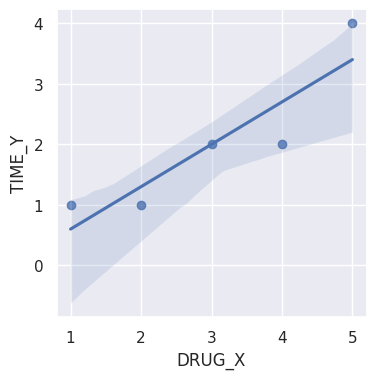

In [11]:
# We can also use seaborn regplot for this
#  This provides automatic linear regression fits (useful for data exploration later on)

sns.regplot(y="TIME_Y", x="DRUG_X", data=stimulus, fit_reg = True)

### Histograms
***


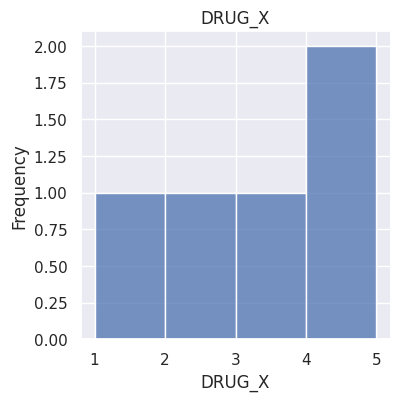

In [12]:
sns.histplot(stimulus, x="DRUG_X")
plt.title("DRUG_X")
plt.xlabel("DRUG_X")
plt.ylabel("Frequency")
plt.show()

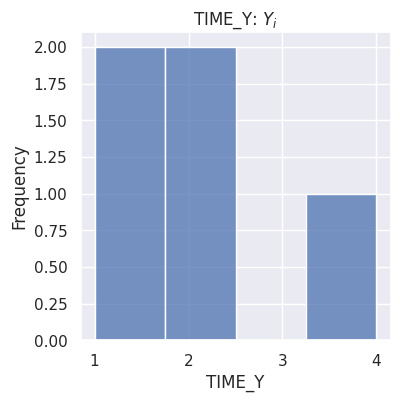

In [13]:
sns.histplot(stimulus, x="TIME_Y")
plt.title('TIME_Y: $Y_i$')
plt.xlabel('TIME_Y')
plt.ylabel('Frequency')
plt.show()

## Simple Linear regression with Stimulus data example
***

Here,

$Y$ = TIME_Y (also called "target" data in python)

and

$X$ = DRUG_X (or independent variable)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression using statsmodels or sklearn. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***

In [14]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
from statsmodels.base.model import Model
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model = ols('TIME_Y ~ DRUG_X',stimulus).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TIME_Y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.36
Date:                Thu, 09 May 2024   Prob (F-statistic):             0.0354
Time:                        14:26:41   Log-Likelihood:                -3.3094
No. Observations:                   5   AIC:                             10.62
Df Residuals:                       3   BIC:                             9.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1000      0.635     -0.157      0.885      -2.121       1.921
DRUG_X         0.7000      0.191      3.656      0.035       0.091       1.309
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.509
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.396
Skew:                          -0.174   Prob(JB):                        0.821
Kurtosis:                       1.667   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.fittedvalues

0    0.6
1    1.3
2    2.0
3    2.7
4    3.4
dtype: float64

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), bbut you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex, for a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


### Fitting Linear Regression using `sklearn`

In [17]:
from sklearn.linear_model import LinearRegression
X = stimulus.drop("TIME_Y", axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object?



In [18]:
# fit a model
lm.fit(X, stimulus.TIME_Y)

LinearRegression()

In [19]:
# inspect the coefficients and intercept
print(lm.coef_, lm.intercept_)
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

[0.7] -0.09999999999999964


,features,estimatedCoefficients
0,DRUG_X,0.7


In [20]:
#predict using the fitted model
# first five predicted prices
lm.predict(X)

array([0.6, 1.3, 2. , 2.7, 3.4])

Text(0.5, 1.0, 'TIME_Y vs Predicted TIME_Y: $Y_i$ vs $\\hat{Y}_i$')

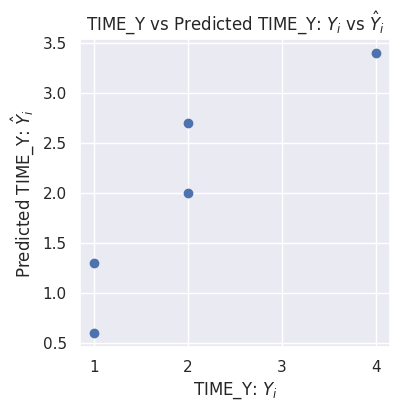

In [21]:
plt.scatter(stimulus.TIME_Y, lm.predict(X))
plt.xlabel("TIME_Y: $Y_i$")
plt.ylabel("Predicted TIME_Y: $\hat{Y}_i$")
plt.title("TIME_Y vs Predicted TIME_Y: $Y_i$ vs $\hat{Y}_i$")

In [ ]:
### Residual sum of squares

#  Let's calculate the residual sum of squares

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [ ]:
print(np.sum(stimulus.TIME_Y - lm.predict(X)) ** 2)

3.0814879110195774e-31


#### Mean squared error

In [24]:
mseFull = np.mean((stimulus.TIME_Y - lm.predict(X)) ** 2)
print(mseFull)

0.22000000000000003


We can also plot the fitted linear regression line.

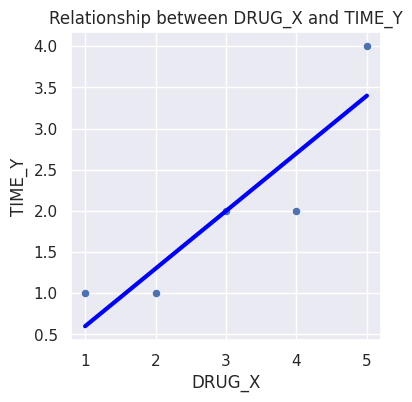

In [23]:
sns.scatterplot(data=stimulus, x="DRUG_X", y="TIME_Y")
plt.xlabel("DRUG_X")
plt.ylabel("TIME_Y")
plt.title("Relationship between DRUG_X and TIME_Y")

plt.plot(stimulus.DRUG_X, lm.predict(X[['DRUG_X']]), color='blue', linewidth=3)
plt.show()